In [2]:
# Initial Imports
import numpy as np
from pathlib import Path
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [3]:
# Read into CSV of Sentiments From Previous Notebook
file_path = Path("Resources/Sentiments.csv")
Sentiments_df = pd.read_csv(file_path)
Sentiments_df

,Unnamed: 0,text,text_sent
0,0,The crypto bull market remains in full throttl...,1
1,1,"Mairs &amp; Power, an investment management fi...",1
2,2,Nvidia (NVDA) - Get Report has been a bit of ...,1
3,3,You can only hate and love so much. The love f...,1
4,4,Nvidia Corp.s stock and the broader chip secto...,1
...,...,...,...
575,15,Google must allow workers at one of its data c...,1
576,16,BTIG analyst Mark Palmer initiated coverage of...,1
577,17,The National Labor Relations Board on Thursday...,-1
578,18,Tesla Inc. is expected to report first-quarter...,-1


In [4]:
# Select the wanted columns
Sentiments_data = Sentiments_df[['text', 'text_sent']]

from sklearn.model_selection import train_test_split

# split the data into train and test set
train, test = train_test_split(Sentiments_data, test_size=0.3, random_state=42, shuffle=False)

In [5]:
# Determine the path where to save the train and test file
train_path = Path("Resources/train.csv")
test_path = Path("Resources/test.csv")

# Save the train and test file

train.to_csv(train_path, index=False)
test.to_csv(test_path, index=False)

In [6]:
# Read into dataframe
data_train = pd.read_csv("Resources/train.csv")
data_test = pd.read_csv("Resources/test.csv")

In [7]:
# Look into test dataframe
data_test

,text,text_sent
0,Losses that triggered the liquidation of posit...,-1
1,Three major omnichannel entertainment giants w...,1
2,Financial markets remained somewhat volatile o...,-1
3,"Smead Capital Management, an investment manage...",1
4,"SILVER SPRING, Md., March 26, 2021 /PRNewswire...",1
...,...,...
169,Google must allow workers at one of its data c...,1
170,BTIG analyst Mark Palmer initiated coverage of...,1
171,The National Labor Relations Board on Thursday...,-1
172,Tesla Inc. is expected to report first-quarter...,-1


In [8]:
# Look into train dataframe
data_train

,text,text_sent
0,The crypto bull market remains in full throttl...,1
1,"Mairs &amp; Power, an investment management fi...",1
2,Nvidia (NVDA) - Get Report has been a bit of ...,1
3,You can only hate and love so much. The love f...,1
4,Nvidia Corp.s stock and the broader chip secto...,1
...,...,...
401,Gold futures were hit Tuesday by rising bond y...,1
402,"Stocks finished firmly higher Friday, capping ...",1
403,ViacomCBS Inc. shares are on track to snap a f...,1
404,Wall Street on Tuesday may be seeing muted act...,1


In [9]:
# Train the model
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                  text_column = 'text',
                  label_columns = 'text_sent',
                   val_df = data_test,
                   maxlen = 400,
                   preprocess_mode = 'bert')

['not_text_sent', 'text_sent']
   not_text_sent  text_sent
0            0.0        1.0
1            0.0        1.0
2            0.0        1.0
3            0.0        1.0
4            0.0        1.0
['not_text_sent', 'text_sent']
   not_text_sent  text_sent
0            0.0        1.0
1            0.0        1.0
2            0.0        1.0
3            0.0        1.0
4            0.0        1.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [10]:
X_train[0].shape

(406, 400)

In [11]:
# Create the model
model = text.text_classifier(name = 'bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess
                            )

Is Multi-Label? False
maxlen is 400
done.


In [12]:
# Get learning rate
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 12)

In [13]:
# Find and plot the learner rate
# This takes a while to run
learner.lr_find(max_epochs = 2)
#learner.lr_plot(max_epochs = 2)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
34/34 [==============================] - 2315s 68s/step - loss: 1.4444 - accuracy: 0.1471
Epoch 2/2
34/34 [==============================] - 2722s 80s/step - loss: 0.4712 - accuracy: 0.9652


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


TypeError: lr_plot() got an unexpected keyword argument 'max_epochs'

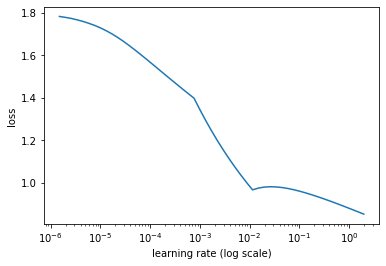

In [14]:
learner.lr_plot()

In [16]:
# Fit the model
# the lr instance was found in the previous line
learner.fit_onecycle(lr = .001, epochs = 2)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/2
34/34 [==============================] - 2500s 74s/step - loss: 0.0657 - accuracy: 0.9704 - val_loss: 7.6766e-06 - val_accuracy: 1.0000
Epoch 2/2
34/34 [==============================] - 2571s 76s/step - loss: 4.9988e-06 - accuracy: 1.0000 - val_loss: 3.5749e-06 - val_accuracy: 1.0000


In [17]:
# Just to see if the model finished running
learner

In [18]:
# Now run the predictor instance
predictor = ktrain.get_predictor(learner.model, preprocess)

In [19]:
# Save the model
predictor.save("Resources/NewsBERT")

In [ ]:
# To Load model
# predictor = ktrain.load_predictor("Resources/NewsBERT")